In [1]:
#importing libraries
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
#Reading covid dataset
country_vacc = pd.read_csv("./WHO-COVID-19-global-data (1).csv")
country_vacc= country_vacc.rename(columns={"Country":"country", "Date_reported":"date" })
country_vacc

,date,Country_code,country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
209266,2022-05-30,ZW,Zimbabwe,AFRO,0,251092,0,5500
209267,2022-05-31,ZW,Zimbabwe,AFRO,0,251092,0,5500
209268,2022-06-01,ZW,Zimbabwe,AFRO,0,251092,0,5500
209269,2022-06-02,ZW,Zimbabwe,AFRO,0,251092,0,5500


In [3]:
#Reading Vaccination dataset
country_vacc2 = pd.read_csv("./country_vaccinations.csv/country_vaccinations.csv").reset_index(drop=True)
country_vacc2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
#reading population dataset
country_vacc3 = pd.read_csv("./2021_population.csv")
country_vacc3 = country_vacc3.rename(columns={'2021_last_updated': 'population'})
country_vacc3


,iso_code,country,population,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,065,329","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,401,310,563","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"334,058,426","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"278,037,263","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,724,796","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [8]:
#Identifying countries which are present in vaccine dataset but not in population dataset
set(country_vacc.country) - set(country_vacc3.country)


{'Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo',
 'Curaçao',
 'Czechia',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guadeloupe',
 'Guernsey',
 'Guinea-Bissau',
 'Holy See',
 'Iran (Islamic Republic of)',
 'Isle of Man',
 'Jersey',
 'Kosovo[1]',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Northern Mariana Islands (Commonwealth of the)',
 'Other',
 'Pitcairn Islands',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'Saba',
 'Saint Barthélemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Sint Eustatius',
 'Syrian Arab Republic',
 'The United Kingdom',
 'Timor-Leste',
 'Trinidad and Tobago',
 

In [9]:
#editing the names of the country
toedit = {"Antigua And Barbuda": 'Antigua and Barbuda',
 "Bolivia": 'Bolivia (Plurinational State of)',
 "Bosnia And Herzegovina": 'Bosnia and Herzegovina',
 "Brunei": 'Brunei Darussalam',
 "Cape Verde": 'Cabo Verde',
 "Curacao": 'Curaçao',
 "North Korea": "Democratic People's Republic of Korea",
 "Republic Of The Congo": 'Democratic Republic of the Congo',
 "Falkland Islands": 'Falkland Islands (Malvinas)',
 "Guinea Bissau": 'Guinea-Bissau',
 "Iran": 'Iran (Islamic Republic of)',
 "Isle Of Man": 'Isle of Man',
 "Laos": "Lao People's Democratic Republic",
 "Micronesia": 'Micronesia (Federated States of)',
 "Northern Mariana Islands": 'Northern Mariana Islands (Commonwealth of the)',
 "South Korea": 'Republic of Korea',
 "Moldova": 'Republic of Moldova',
 "Russia": 'Russian Federation',
 "Reunion": 'Réunion',
 "Saint Kitts And Nevis": 'Saint Kitts and Nevis',
 "Saint Pierre And Miquelon": 'Saint Pierre and Miquelon',
 "Saint Vincent And The Grenadines": 'Saint Vincent and the Grenadines',
 "Sao Tome And Principe": 'Sao Tome and Principe',
 "Syria": 'Syrian Arab Republic',
 "United Kingdom": 'The United Kingdom',
 "Timor Leste": 'Timor-Leste',
 "Trinidad And Tobago": 'Trinidad and Tobago',
 "Turks And Caicos Islands": 'Turks and Caicos Islands',
 "Tanzania": 'United Republic of Tanzania',
 "United States": 'United States of America',
 "Venezuela": 'Venezuela (Bolivarian Republic of)',
 "Vietnam": 'Viet Nam',
 "Wallis And Futuna": 'Wallis and Futuna',
 "Palestine": 'occupied Palestinian territory, including east Jerusalem'}
country_vacc3["country"] = country_vacc3["country"].replace(toedit)
country_vacc2["country"] = country_vacc2["country"].replace(toedit)

In [10]:
who = country_vacc[["date", "country","New_deaths"]]
population = country_vacc3[["iso_code","country", "population"]]
vaccine =country_vacc2[["country","iso_code","date","total_vaccinations","people_vaccinated","people_fully_vaccinated"]]
# We drop rows with NaN value at this stage from  vaccine data frame
#vaccine = vaccine.dropna().reset_index(drop=True) 


In [11]:
who

,date,country,New_deaths
0,2020-01-03,Afghanistan,0
1,2020-01-04,Afghanistan,0
2,2020-01-05,Afghanistan,0
3,2020-01-06,Afghanistan,0
4,2020-01-07,Afghanistan,0
...,...,...,...
209266,2022-05-30,Zimbabwe,0
209267,2022-05-31,Zimbabwe,0
209268,2022-06-01,Zimbabwe,0
209269,2022-06-02,Zimbabwe,0


In [12]:
#displaying null values
vaccine.isnull().sum()

country                        0
iso_code                       0
date                           0
total_vaccinations         42905
people_vaccinated          45218
people_fully_vaccinated    47710
dtype: int64

In [13]:
population

,iso_code,country,population
0,CHN,China,"1,447,065,329"
1,IND,India,"1,401,310,563"
2,USA,United States of America,"334,058,426"
3,IDN,Indonesia,"278,037,263"
4,PAK,Pakistan,"227,724,796"
...,...,...,...
219,MSR,Montserrat,"4,977"
220,FLK,Falkland Islands (Malvinas),"3,533"
221,NIU,Niue,"1,619"
222,TKL,Tokelau,"1,373"


In [14]:
vaccine

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN
...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0


In [15]:
#We drop rows with NaN value at this stage from  vaccine data frame
vaccine = vaccine.dropna().reset_index(drop=True) 

In [16]:
vaccine

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0
...,...,...,...,...,...,...
37431,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0
37432,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0
37433,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0
37434,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0


In [17]:
#merging the covid and population dataset
who_population_merge = pd.merge(who, population).reset_index(drop=True)
who_population_merge.head(2)

,date,country,New_deaths,iso_code,population
0,2020-01-03,Afghanistan,0,AFG,"40,374,668"
1,2020-01-04,Afghanistan,0,AFG,"40,374,668"


In [18]:
who_population_merge

,date,country,New_deaths,iso_code,population
0,2020-01-03,Afghanistan,0,AFG,"40,374,668"
1,2020-01-04,Afghanistan,0,AFG,"40,374,668"
2,2020-01-05,Afghanistan,0,AFG,"40,374,668"
3,2020-01-06,Afghanistan,0,AFG,"40,374,668"
4,2020-01-07,Afghanistan,0,AFG,"40,374,668"
...,...,...,...,...,...
190723,2022-05-30,Zimbabwe,0,ZWE,"15,229,891"
190724,2022-05-31,Zimbabwe,0,ZWE,"15,229,891"
190725,2022-06-01,Zimbabwe,0,ZWE,"15,229,891"
190726,2022-06-02,Zimbabwe,0,ZWE,"15,229,891"


In [19]:
#merging the merged dataset and vaccination dataset
df = pd.merge(vaccine,who_population_merge).reset_index(drop=True)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,"40,374,668"
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,"40,374,668"
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,"40,374,668"
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,"40,374,668"
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,"40,374,668"
...,...,...,...,...,...,...,...,...
33314,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,2,"15,229,891"
33315,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,2,"15,229,891"
33316,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,1,"15,229,891"
33317,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,"15,229,891"


In [20]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       

In [21]:
mask=(df['date']>='2020-12-04') & (df['date']<='2021-12-31').reset_index(drop=True)
df=df[mask]

In [22]:
df.reset_index(drop=True)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,"40,374,668"
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,"40,374,668"
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,"40,374,668"
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,"40,374,668"
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,"40,374,668"
...,...,...,...,...,...,...,...,...
26786,Zimbabwe,ZWE,2021-12-26,7214640.0,4103288.0,3111352.0,14,"15,229,891"
26787,Zimbabwe,ZWE,2021-12-27,7222381.0,4105296.0,3113142.0,6,"15,229,891"
26788,Zimbabwe,ZWE,2021-12-28,7226334.0,4107151.0,3115190.0,17,"15,229,891"
26789,Zimbabwe,ZWE,2021-12-29,7238939.0,4112517.0,3121776.0,32,"15,229,891"


In [23]:
df.shape

(26791, 8)

## Converting string value of population of each country to float value

In [28]:
def f_1(row):
    row.population = row.population.replace(',','')
    return row
df=df.apply(f_1, axis=1)
df.population = df.population.astype("float64")
df.people_vaccinated = df.people_vaccinated.astype("float64")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26791 entries, 0 to 33230
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  26791 non-null  object 
 1   iso_code                 26791 non-null  object 
 2   date                     26791 non-null  object 
 3   total_vaccinations       26791 non-null  float64
 4   people_vaccinated        26791 non-null  float64
 5   people_fully_vaccinated  26791 non-null  float64
 6   New_deaths               26791 non-null  int64  
 7   population               26791 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In [30]:
df.shape

(26791, 8)

In [31]:
df['date']=pd.to_datetime(df['date'])

### Calculating vaccination rates for each countries

In [32]:
#Vaccination rates
df = df.assign(ratio=[0]*len(df))
def f_2(row):
    row.ratio = row.people_vaccinated / row.population * 100 
    return row
df=df.apply(f_2, axis=1)

In [33]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


# Modeling

### Taking a look at our data to get more acquainted with it by plotting a the percentage of vaccinations and recent deaths of the COVID-19.let's take an example of Brazil

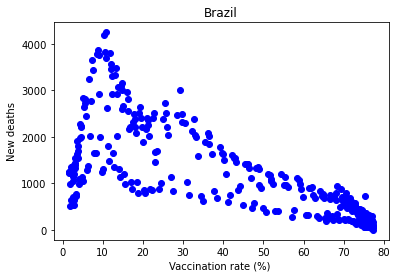

In [311]:
mydf= df
mydf = mydf[mydf.country ==  'Brazil']
plt.scatter( mydf.ratio , mydf.New_deaths, color='blue')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.title("Brazil")
plt.show()

Inferences:
As we can see as the vaccination rate of Italy increases,the death rate also decreases.It shows that as there is increase in number of vaccinated people,the less number of people getting infected severely which helps in bringing down the death rate.

In [290]:
X = mydf['ratio']
y = mydf['New_deaths']

#### Train-Test Split

- Split variables into training and testing sets. 
- Perform this by importing `train_test_split` from the `sklearn.model_selection` library. 
- It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=100,test_size=0.2)

In [293]:
X_train.head()

4303    76.473605
4160    40.619750
4113    20.502059
4212    64.188355
4194    55.626792
Name: ratio, dtype: float64

In [294]:
X_train.shape

(257,)

In [295]:
y_train.head()

4303     305
4160    1205
4113     790
4212     839
4194     966
Name: New_deaths, dtype: int64

In [296]:
X_train = np.array(X_train).reshape(-1,1)
X_train.shape

(257, 1)

In [297]:
y_train = np.array(y_train).reshape(-1,1)
y_train.shape

(257, 1)

#### Building a Linear Model

- import the `linear_model` library for performing the linear regression.

In [298]:
from sklearn import linear_model

In [299]:
lr = linear_model.LinearRegression()

In [300]:
lr.fit(X_train,y_train)

LinearRegression()

In [301]:
lr.intercept_

array([2295.55830352])

In [302]:
lr.coef_

array([[-26.18353492]])

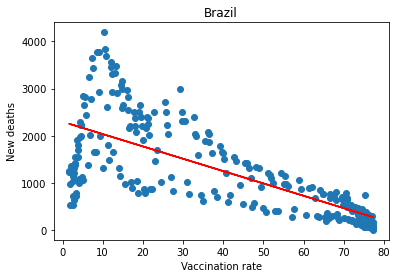

In [313]:
plt.scatter(X_train, y_train)
plt.plot(X_train,2295.558-26.1835*X_train, 'r')
plt.title("Brazil")
plt.ylabel("New deaths")
plt.xlabel("Vaccination rate")
plt.show()

In [305]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)

In [307]:
# 
X_test = np.array(X_test).reshape(-1,1)

# Predict the y values corresponding to X_test
y_pred = lr.predict(X_test)

In [308]:
y_pred

array([[ 415.06006111],
       [2041.43994332],
       [ 390.42537184],
       [2252.48635471],
       [1012.26614216],
       [2221.01634747],
       [2139.33659512],
       [ 422.29031452],
       [2065.19753318],
       [1934.77389411],
       [ 770.11448184],
       [ 362.32393089],
       [2235.26814937],
       [1985.03362164],
       [ 279.57442562],
       [1152.49832785],
       [ 376.27447325],
       [ 394.05940192],
       [ 290.12382354],
       [ 436.6671395 ],
       [ 456.63269585],
       [ 355.60036341],
       [1667.85234458],
       [ 725.03943372],
       [ 504.87751405],
       [1692.36385113],
       [1168.983799  ],
       [1022.19989467],
       [2201.69780808],
       [2152.4748653 ],
       [2242.83270362],
       [ 279.46813529],
       [1706.62303887],
       [2014.05318633],
       [ 270.6259154 ],
       [ 485.52912659],
       [ 745.64939884],
       [1960.1721041 ],
       [ 531.22493902],
       [ 675.30505174],
       [ 389.12987537],
       [ 316.277

In [309]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [310]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.49880041040377776

Let;s take example of 'Italy'

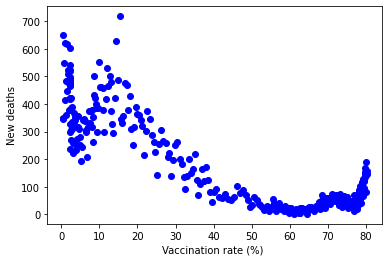

In [54]:
mydf= df
mydf = mydf[mydf.country == 'Italy']
plt.scatter( mydf.ratio , mydf.New_deaths, color='blue')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

In [203]:
X1 = mydf[['ratio']]
y1 = mydf['New_deaths']

#### Train-Test Split

- Split variables into training and testing sets. 
- Perform this by importing `train_test_split` from the `sklearn.model_selection` library. 
- It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X1,y1,random_state=100,test_size=0.2)

In [206]:
X_train.head()

,ratio
14905,12.678648
14913,15.322917
14877,6.122407
15112,77.211798
14927,20.901472


In [207]:
y_train.head()

14905    501
14913    718
14877    339
15112     30
14927    342
Name: New_deaths, dtype: int64

In [208]:
X_train = np.array(X_train).reshape(-1,1)
X_train.shape

(289, 1)

In [209]:
y_train = np.array(y_train).reshape(-1,1)
y_train.shape

(289, 1)

#### Building a Linear Model

- import the `linear_model` library for performing the linear regression.

In [210]:
lr1 = linear_model.LinearRegression()

In [211]:
lr1.fit(X_train,y_train)

LinearRegression()

In [212]:
lr1.coef_

array([[-4.89864989]])

In [213]:
lr1.intercept_

array([401.44164934])

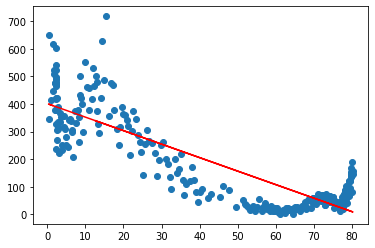

In [214]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 401.441-4.89*X_train, 'r')
plt.show()

In [215]:
# 
X_test = np.array(X_test).reshape(-1,1)

# Predict the y values corresponding to X_test
y_pred = lr1.predict(X_test)

In [216]:
y_pred

array([[357.32207444],
       [ 23.92190821],
       [ 30.37788132],
       [ 27.59058693],
       [ 21.06267767],
       [ 14.48963981],
       [ 99.2303116 ],
       [ 70.67079083],
       [323.3997778 ],
       [399.19296653],
       [183.33841141],
       [ 24.4911361 ],
       [ 13.14461733],
       [111.90540775],
       [187.05860186],
       [ 87.26748729],
       [313.01740486],
       [163.86154026],
       [395.24463989],
       [390.30833218],
       [ 96.93672757],
       [101.52091521],
       [ 48.33669504],
       [367.35979056],
       [354.30332236],
       [220.55390247],
       [376.18874708],
       [ 46.16057369],
       [ 19.69533046],
       [ 41.18135442],
       [ 63.5242047 ],
       [ 25.15480353],
       [ 32.55271954],
       [ 20.89561981],
       [ 36.33638402],
       [ 16.46175257],
       [ 65.53904223],
       [ 40.48401717],
       [155.59135985],
       [386.08101541],
       [ 22.43847077],
       [106.49511568],
       [ 63.92858364],
       [ 19

In [217]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [218]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7486266531343186

### Progress of vaccination rates of certain countries

C:\Users\Akash\AppData\Local\Temp/ipykernel_25000/19397387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['date']=pd.to_datetime(df_A['date'])


Text(0.5, 1.0, 'Progress of Vaccination Rates of certain countries')

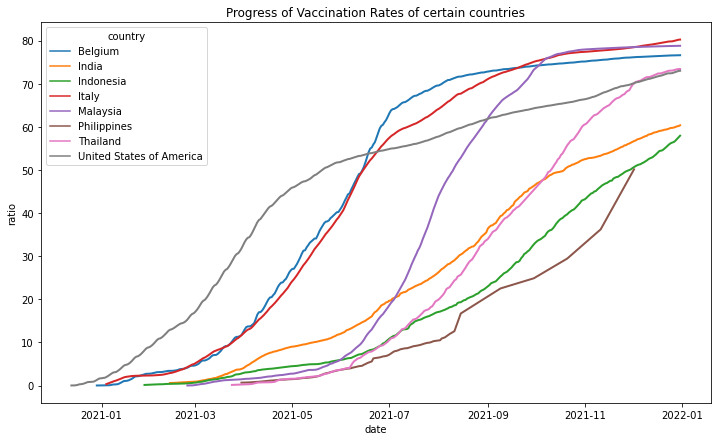

In [219]:
import seaborn as sns
df_plot = df.loc[:,['country', 'date', 'ratio']]
grpA = [ 'Philippines', 'Malaysia', 'Thailand', 'Brunei', 'India', 'Indonesia','Belgium','Italy','United States of America']
df_A = df_plot[df_plot['country'].isin(grpA)]

df_A['date']=pd.to_datetime(df_A['date'])

fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(x = 'date', y = 'ratio', hue='country',data = df_A, ax = axes, linewidth = 2)
plt.title("Progress of Vaccination Rates of certain countries")


Inferences:
As we can see US unlike any other countries started their vaccination process  much earlier ,but still has most no of deaths due to covid.(Reference Graph) .We observe that Italy has the maximum vaccination peak showing that the people are more responsive  towards geting their shots which in turn will reduce the no of deaths due to covid.

### Top 5 countries in terms of total vaccinations 

In [72]:
#Function for finding maximum no of total vaccinations
def vaccination_country(col_name):
 return  (country_vacc2[['country',col_name]].groupby(by='country')
          .max()
          .sort_values(by=col_name,ascending= False)
          .reset_index())

In [73]:
max_total_vaccinations = vaccination_country('total_vaccinations')

In [198]:
max_total_vaccinations.head(18)

,country,total_vaccinations
0,China,3.263129e+09
1,India,1.834501e+09
2,United States of America,5.601818e+08
3,Brazil,4.135596e+08
4,Indonesia,3.771089e+08
5,Japan,2.543456e+08
6,Bangladesh,2.436427e+08
7,Pakistan,2.193686e+08
8,Viet Nam,2.031444e+08
9,Mexico,1.919079e+08


In [75]:
max_total_vaccinations[max_total_vaccinations['country']=='Italy']

,country,total_vaccinations
17,Italy,135870869.0


In [76]:
df[df['country']=='Italy']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
14817,Italy,ITA,2021-01-04,196638.0,196638.0,9.0,347,60320493.0,0.325989
14818,Italy,ITA,2021-01-05,276896.0,276896.0,11.0,348,60320493.0,0.459041
14819,Italy,ITA,2021-01-06,342075.0,342075.0,13.0,649,60320493.0,0.567096
14820,Italy,ITA,2021-01-07,434720.0,434720.0,15.0,548,60320493.0,0.720684
14821,Italy,ITA,2021-01-08,531704.0,531704.0,15.0,414,60320493.0,0.881465
...,...,...,...,...,...,...,...,...,...
15174,Italy,ITA,2021-12-27,109178618.0,48197868.0,44649374.0,81,60320493.0,79.902974
15175,Italy,ITA,2021-12-28,109830118.0,48258012.0,44686676.0,142,60320493.0,80.002682
15176,Italy,ITA,2021-12-29,110470976.0,48319111.0,44715919.0,190,60320493.0,80.103972
15177,Italy,ITA,2021-12-30,111053694.0,48375025.0,44743075.0,148,60320493.0,80.196667


In [199]:
#def pop(col_name):
r=df[['country','population']].groupby(by='country').max().sort_values(by='population',ascending=False) .reset_index()
r.head(23)   
#r=pop()

,country,population
0,China,1.447065e+09
1,India,1.401311e+09
2,United States of America,3.340584e+08
3,Indonesia,2.780373e+08
4,Pakistan,2.277248e+08
5,Brazil,2.148329e+08
6,Nigeria,2.145077e+08
7,Bangladesh,1.672475e+08
8,Russian Federation,1.459000e+08
9,Mexico,1.310461e+08


In [78]:
r[r['country']=='Italy']

,country,population
22,Italy,60320493.0


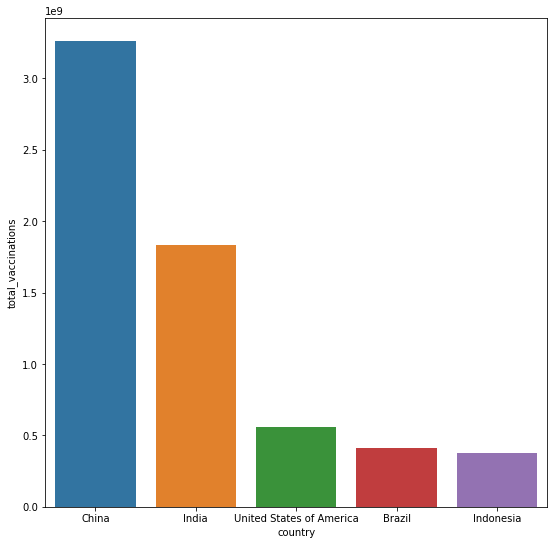

In [186]:
#plotting countries having maximum no of total vaccinations 
plt.figure(figsize=(9,9))

sns.barplot(x='country',y='total_vaccinations',data=max_total_vaccinations.head(5))
plt.title

plt.show()

Inferences:
As china has high gdp so it can manufacture required number of vaccines and followed by India it has 1.87 billion of total vaccinations.Here we can also see US though having highest gdp still ranks 3rd in the graph which is mainly due to vaccination hesitancy of people.In this the total vaccination of Italy is not mentioned though having highest vaccination peak as it has less population  having less total vaccinations compared to highly populated countries like US,CHINA

In [80]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Falkland Islands (Malvinas)',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar

In [81]:
gf=df[df['country']=='China']
gf.total_vaccinations.max()

2795716000.0

### countries with minimum vaccination rates(NOT INCLUDED IN PPT)

In [82]:
def vaccination_country1(col_name):
 return  (df[['country',col_name]].groupby(by='country')
          .max()
          .sort_values(by=col_name,ascending= False)
          .reset_index())

In [83]:
max_vaccination_rate= vaccination_country1('ratio')

In [84]:
max_vaccination_rate.head()

,country,ratio
0,Gibraltar,122.182325
1,Malta,100.218417
2,United Arab Emirates,98.308898
3,Cuba,92.366061
4,Portugal,91.887679


In [85]:
max_vaccination_rate.tail()

,country,ratio
192,Niger,1.975335
193,Chad,1.193104
194,Yemen,1.074325
195,Haiti,1.066226
196,Burundi,0.032158


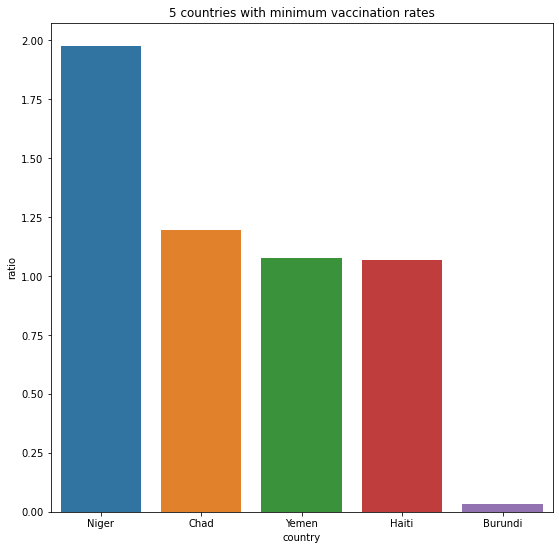

In [86]:
plt.figure(figsize=(9,9))

sns.barplot(x='country',y='ratio',data=max_vaccination_rate.tail())

plt.title("5 countries with minimum vaccination rates")
plt.show()

### Compare vaccination rates of rich countries and poor country(NOT INCLUDED IN PPT)

In [87]:
df3=df[df['country']=='Haiti']

In [88]:
df3['date']=pd.to_datetime(df3['date'])

C:\Users\Akash\AppData\Local\Temp/ipykernel_25000/3029150507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date']=pd.to_datetime(df3['date'])


In [89]:
df4=df[df['country']=='United States of America']

In [90]:
df4['date']=pd.to_datetime(df4['date'])

C:\Users\Akash\AppData\Local\Temp/ipykernel_25000/3752183426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['date']=pd.to_datetime(df4['date'])


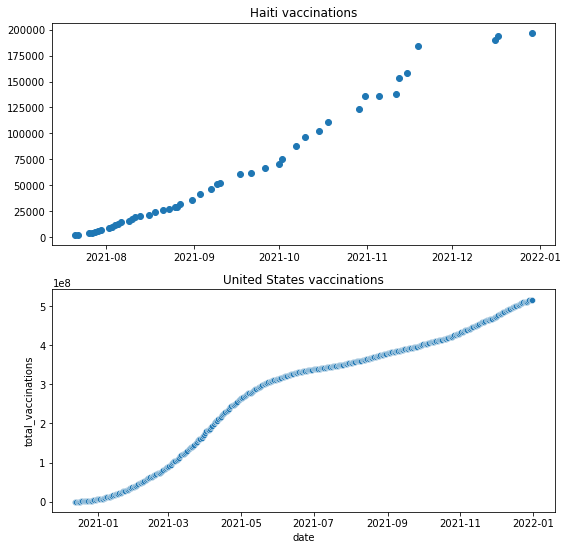

In [91]:
plt.figure(figsize=(9,9))
plt.subplot(211)   

# The subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. 
plt.scatter(data=df3,x='date',y='total_vaccinations')
plt.title('Haiti vaccinations')

plt.subplot(212)
sns.scatterplot(data=df4,x='date',y='total_vaccinations')
plt.title('United States vaccinations')
plt.show()

Inferences:

As we can see the vaccination began in month of january for usa but for Haiti the country vaccination began in the month of july which surely describes that vaccination in Haiti started very late because Haiti is the poorest country in the world due to which the government could not afford the vaccination on the time.

# Overall Deaths in the countries

In [92]:
df9=df[df['country']=='Afghanistan']
df9

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
5,Afghanistan,AFG,2021-05-30,600152.0,480226.0,119926.0,20,40374668.0,1.189424
6,Afghanistan,AFG,2021-06-02,626290.0,481690.0,144600.0,34,40374668.0,1.193050
7,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,27,40374668.0,1.193323
8,Afghanistan,AFG,2021-06-08,641295.0,482952.0,158343.0,64,40374668.0,1.196176
9,Afghanistan,AFG,2021-06-14,662003.0,484737.0,177266.0,85,40374668.0,1.200597


In [93]:
df9[['New_deaths']].sum()

New_deaths    740
dtype: int64

In [94]:
e=df[['country','New_deaths']].groupby(by='country').sum().reset_index().sort_values(by='New_deaths',ascending=False)
e

,country,New_deaths
186,United States of America,516338
26,Brazil,391263
79,India,311257
144,Russian Federation,197428
111,Mexico,125469
...,...,...
159,Solomon Islands,0
179,Turkmenistan,0
36,Central African Republic,0
174,Tokelau,0


In [95]:
e=e.rename(columns={'New_deaths':"deaths"})
e

,country,deaths
186,United States of America,516338
26,Brazil,391263
79,India,311257
144,Russian Federation,197428
111,Mexico,125469
...,...,...
159,Solomon Islands,0
179,Turkmenistan,0
36,Central African Republic,0
174,Tokelau,0


Text(0.5, 1.0, 'Countries having maximum deaths')

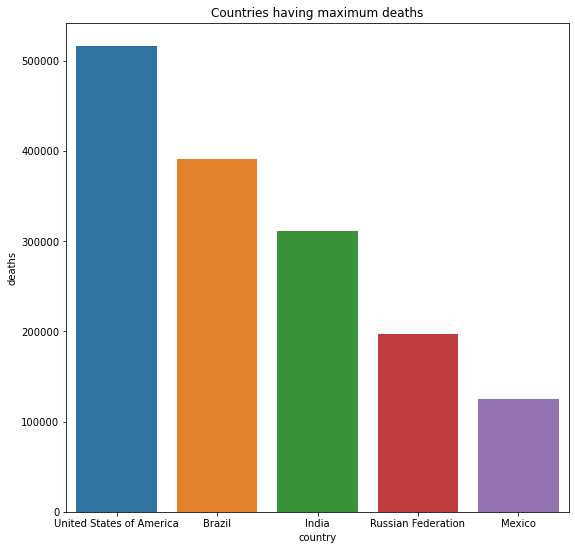

In [194]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.barplot(data=e.head(5),x='country',y='deaths')
plt.title("Countries having maximum deaths")

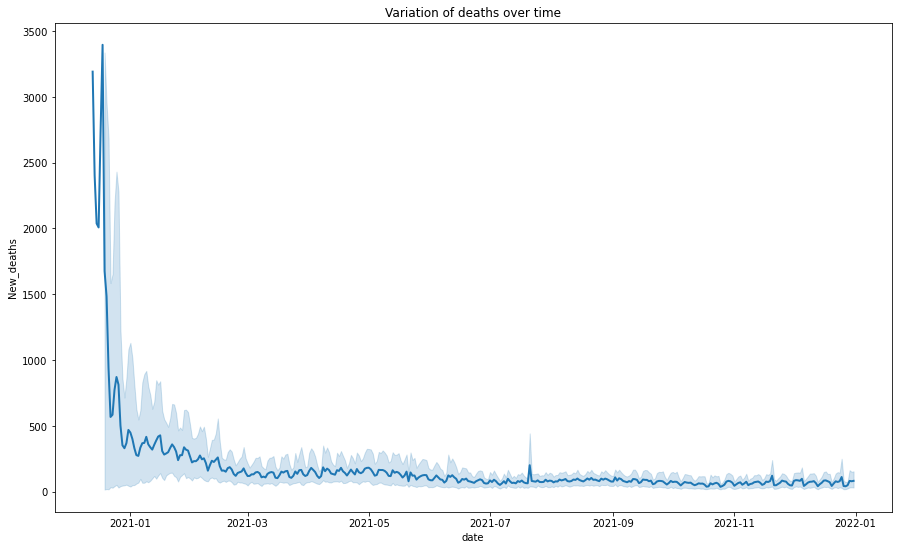

In [190]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df,x='date',y='New_deaths',linewidth=2)
plt.title("Variation of deaths over time")
plt.show()

Inferences:

We can see from the graph the deaths were exponentially high when vaccines were not properly developed but as soon as the first vaccination dose was given, fall in the no of deaths was observed.Also some countries did not got early vaccination approvals leading to increase in the no of deaths.This also resulted deaths from non-covid diseases like heart-attack,alzimer increased during surges.Several other factors like Vaccination rates and total vaccinations of particular country  also effect no of deaths. 

## Analyse whether increase in the no of vaccinated people result in more deaths (NOT INCLUDED IN PPT)

In [98]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
...,...,...,...,...,...,...,...,...,...
33226,Zimbabwe,ZWE,2021-12-26,7214640.0,4103288.0,3111352.0,14,15229891.0,26.942333
33227,Zimbabwe,ZWE,2021-12-27,7222381.0,4105296.0,3113142.0,6,15229891.0,26.955518
33228,Zimbabwe,ZWE,2021-12-28,7226334.0,4107151.0,3115190.0,17,15229891.0,26.967698
33229,Zimbabwe,ZWE,2021-12-29,7238939.0,4112517.0,3121776.0,32,15229891.0,27.002931


<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='New_deaths'>

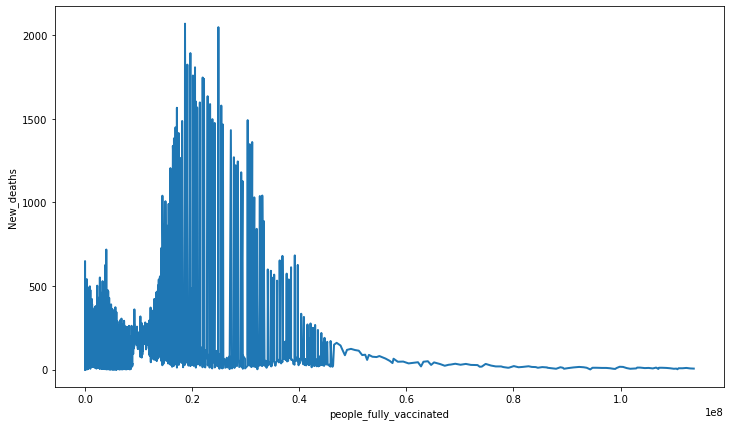

In [248]:
df_plot = df.loc[:,['country', 'New_deaths', 'people_fully_vaccinated']]
grpA = [ 'Philippines', 'Malaysia', 'Thailand', 'Brunei',  'Indonesia','Belgium','Italy',]
df_A = df_plot[df_plot['country'].isin(grpA)]

#df_A['date']=pd.to_datetime(df_A['date'])

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(y = 'New_deaths', x = 'people_fully_vaccinated', data = df_A, ax = axes, linewidth = 2)


In [100]:
e1=df[['country','people_fully_vaccinated','New_deaths']].groupby(by='country').sum().reset_index().sort_values(by='New_deaths',ascending=False)
e1

,country,people_fully_vaccinated,New_deaths
186,United States of America,4.799684e+10,516338
26,Brazil,1.691485e+10,391263
79,India,5.133794e+10,311257
144,Russian Federation,7.747918e+09,197428
111,Mexico,7.035703e+09,125469
...,...,...,...
159,Solomon Islands,4.280780e+05,0
179,Turkmenistan,6.432070e+06,0
36,Central African Republic,1.615646e+06,0
174,Tokelau,9.680000e+02,0


In [101]:
e1.rename(columns={'New_deaths':"deaths"})

,country,people_fully_vaccinated,deaths
186,United States of America,4.799684e+10,516338
26,Brazil,1.691485e+10,391263
79,India,5.133794e+10,311257
144,Russian Federation,7.747918e+09,197428
111,Mexico,7.035703e+09,125469
...,...,...,...
159,Solomon Islands,4.280780e+05,0
179,Turkmenistan,6.432070e+06,0
36,Central African Republic,1.615646e+06,0
174,Tokelau,9.680000e+02,0


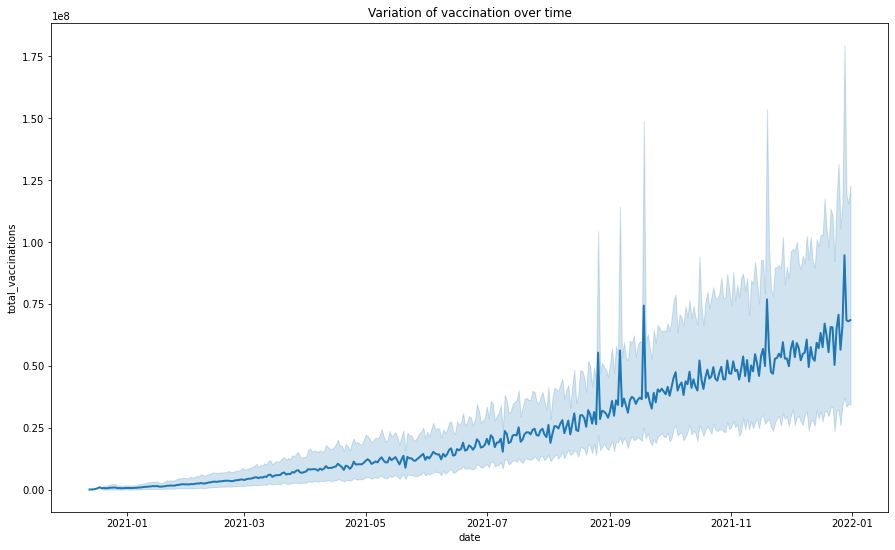

In [225]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df,x='date',y='total_vaccinations',linewidth=2)
plt.title("Variation of vac3cination over time")
plt.show()